In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#from ipywidgets import widgets
import numpy as np
#%pylab osx

In [2]:
# normalise the feature values between a 0 1 range
from sklearn import preprocessing
def norm(features):
    features_array = features.values #return a numpy array
    min_max_scalar = preprocessing.MinMaxScaler()
    normalise = min_max_scalar.fit_transform(features_array)
    normalised_features = pd.DataFrame(normalise)

    # rename index and columns
    normalised_features.columns = features.columns
    normalised_features.index = features.index

    features = normalised_features.copy(deep=True)
    return features

In [3]:
# load data, remove 'Type', calculate 'magnitude', normalise and display format
right_knee = pd.read_csv('sensor_log/right_knee.txt', sep='\t', index_col='Timestamp')
left_knee = pd.read_csv('sensor_log/left_knee.txt', sep='\t', index_col='Timestamp')
right_hip = pd.read_csv('sensor_log/right_hip.txt', sep='\t', index_col='Timestamp')
left_hip = pd.read_csv('sensor_log/left_hip.txt', sep='\t', index_col='Timestamp')
right_arm = pd.read_csv('sensor_log/right_arm.txt', sep='\t', index_col='Timestamp')
left_arm = pd.read_csv('sensor_log/left_arm.txt', sep='\t', index_col='Timestamp')
right_foot = pd.read_csv('sensor_log/right_foot.txt', sep='\t', index_col='Timestamp')
left_foot = pd.read_csv('sensor_log/left_foot.txt', sep='\t', index_col='Timestamp')
raw_logs = [right_knee, left_knee, right_hip, left_hip, right_arm, left_arm, right_foot, left_foot]
for l in raw_logs:
    l.drop('Type', axis=1, inplace=True)
    l['magnitude'] = np.sqrt( l['X']**2 + l['Y']**2 + l['Z']**2 )

In [4]:
# trim data right knee, normalise, reset index to unify, add identifier to name
right_knee = right_knee[right_knee.index > 250739278]
right_knee = right_knee[right_knee.index < 250850000]
right_knee = norm(right_knee)
right_knee = right_knee.reset_index(drop=True)
right_knee.columns = ['right_knee_' + str(col) for col in right_knee.columns]

In [5]:
# trim data left_knee, normalise, reset index to unify, add identifier to name
left_knee = left_knee[left_knee.index > 16630000]
left_knee = left_knee[left_knee.index < 16756000]
left_knee = norm(left_knee)
left_knee = left_knee.reset_index(drop=True)
left_knee.columns = ['left_knee_' + str(col) for col in left_knee.columns]

In [6]:
# trim data right_hip, normalise, reset index to unify, add identifier to name
right_hip = right_hip[right_hip.index > 9116132]
right_hip = right_hip[right_hip.index < 9230000]
right_hip = norm(right_hip)
right_hip = right_hip.reset_index(drop=True)
right_hip.columns = ['right_hip_' + str(col) for col in right_hip.columns]

In [7]:
# trim data left_hip, normalise, reset index to unify, add identifier to name
left_hip = left_hip[left_hip.index > 879227949]
left_hip = left_hip[left_hip.index < 879337949]
left_hip = norm(left_hip)
left_hip = left_hip.reset_index(drop=True)
left_hip.columns = ['left_hip_' + str(col) for col in left_hip.columns]

In [8]:
# trim data right_arm, normalise, reset index to unify, add identifier to name
right_arm = right_arm[right_arm.index > 194779513]
right_arm = right_arm[right_arm.index < 194909513]
right_arm = norm(right_arm)
right_arm = right_arm.reset_index(drop=True)
right_arm.columns = ['right_arm_' + str(col) for col in right_arm.columns]

In [9]:
# trim data left arm, normalise, reset index to unify, add identifier to name
left_arm = left_arm[left_arm.index > 1188100056]
left_arm = left_arm[left_arm.index < 1188240056]
left_arm = norm(left_arm)
left_arm = left_arm.reset_index(drop=True)
left_arm.columns = ['left_arm_' + str(col) for col in left_arm.columns]

In [10]:
# trim data right_foot, normalise, reset index to unify, add identifier to name
right_foot = right_foot[right_foot.index > 140800245]
right_foot = right_foot[right_foot.index < 140910245]
right_foot = norm(right_foot)
right_foot = right_foot.reset_index(drop=True)
right_foot.columns = ['right_foot_' + str(col) for col in right_foot.columns]

In [11]:
# trim data right_foot, normalise, reset index to unify, add identifier to name
left_foot = left_foot[left_foot.index > 244818069]
left_foot = left_foot[left_foot.index < 244929597]
left_foot = norm(left_foot)
left_foot = left_foot.reset_index(drop=True)
left_foot.columns = ['left_foot_' + str(col) for col in left_foot.columns]

In [12]:
# put all of them in a big df and remove nan
apa = pd.concat([right_knee, left_knee, right_hip, left_hip, right_arm, left_arm, right_foot, left_foot], axis=1)
apa = apa.dropna()

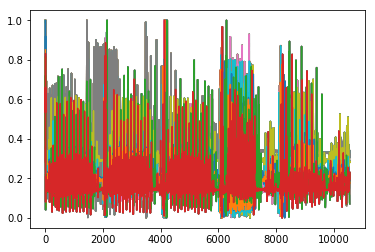

In [13]:
# plot all magnitudes, just because fun
bepa = ['right_knee_magnitude', 'left_knee_magnitude', 'right_hip_magnitude', 'left_hip_magnitude', 'right_arm_magnitude', 'left_arm_magnitude', 'right_foot_magnitude', 'left_foot_magnitude']
for b in bepa:
    plt.plot(apa.index, apa[bepa])
plt.show()

In [14]:
# pickle data for easier use in future
apa.to_pickle('accelerometer_data.pkl')

In [15]:
# plot data
#plt.figure()
#plt.title('X, Y, Z acceleration')
#plt.plot(a.index, a['X'])
#plt.plot(a.index, a['Y'])
#plt.plot(a.index, a['Z'])
#plt.figure()
#plt.title('magnitude acceleration')
#plt.plot(a.index, a['magnitude'])
#plt.show()